In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, classification_report, 
                             ConfusionMatrixDisplay)

from sklearn import set_config
set_config(transform_output="pandas")

from category_encoders import HashingEncoder

import sqlite3

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay

import joblib



# Calibration

/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature nam

                    Train Evaluation                                       Test Evaluation                   
              precision    recall  f1-score   support                precision    recall  f1-score   support 
                                                                                                             
           0       0.92      1.00      0.96    197845             0       0.92      1.00      0.96     56514 
           1       0.81      0.03      0.07     17412             1       0.55      0.02      0.04      4988 
                                                                                                             
    accuracy                           0.92    215257      accuracy                           0.92     61502 
   macro avg       0.87      0.52      0.51    215257     macro avg       0.74      0.51      0.50     61502 
weighted avg       0.91      0.92      0.89    215257  weighted avg       0.89      0.92      0.88     61502 


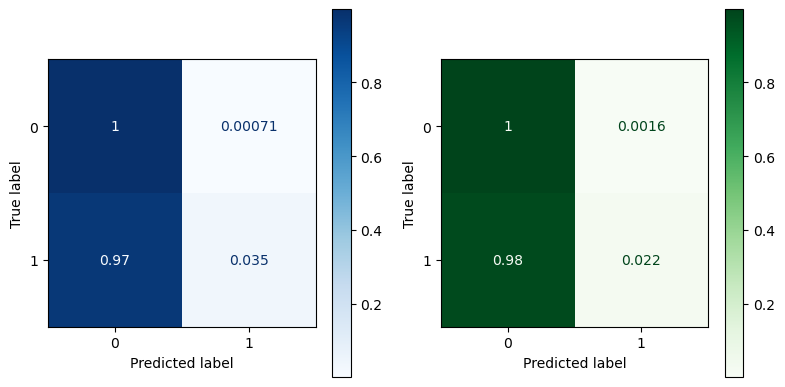

/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(


In [ ]:
calibrated_clf = CalibratedClassifierCV(FrozenEstimator(stacked_clf), n_jobs=-1).fit(X_test, y_test)

calibrated_clf_results = eval_classification(calibrated_clf, X_train, y_train, X_test, y_test,
                                  model_name="Calibrated Classifier", results_frame=stacked_clf_results)

In [ ]:
calibrated_clf_results.style.background_gradient()

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
Logistic Regression,0.688647,0.686970,0.160524,0.158756,0.673616,0.665196,0.259265,0.256335,0.745769,0.739989
Logistic Regression CV,0.688749,0.686758,0.160526,0.158690,0.673329,0.665397,0.259246,0.256264,0.745610,0.739922
Decision Tree,1.000000,0.857940,1.000000,0.148113,1.000000,0.158180,1.000000,0.152981,1.000000,0.538940
Decision Tree CV,0.706783,0.703636,0.163315,0.155216,0.636630,0.597434,0.259946,0.246413,0.733137,0.706668
AdaBoosted Decision Tree,0.706783,0.703636,0.163315,0.155216,0.636630,0.597434,0.259946,0.246413,0.712692,0.688920
Random Forest,0.999972,0.918929,1.000000,0.535714,0.999655,0.003007,0.999828,0.005981,1.000000,0.733311
Random Forest CV,0.999851,0.918653,0.998508,0.453988,0.999655,0.014836,0.999082,0.028732,0.999998,0.729412
Histogram-based Gradient Boosting Tree,0.728292,0.714367,0.192004,0.174911,0.735297,0.678428,0.304496,0.278118,0.809763,0.766911
XGBoost,0.927538,0.918019,0.844867,0.454082,0.127613,0.053528,0.221734,0.095768,0.870633,0.756757
XGBoost Random Forest,0.963890,0.905629,0.867929,0.327703,0.652941,0.155573,0.745239,0.210984,0.987932,0.738675


# iterate through different scikit-learn models

In [ ]:
# -------- Cross validate model with Kfold stratified cross val ---------------

kfold = StratifiedKFold(n_splits=10)

# Modeling step Test differents algorithms
classifiers = ['AdaBoostClassifier',
                'BernoulliNB',
                'DummyClassifier']
results = []
for model in classifiers :
    results.append(cross_val_score(model, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["AdaBoostClassifier","BernoulliNB","DummyClassifier"]})`

In [ ]:
# # First 	1	Enable GPU Runtime:
# 	•	Go to "Runtime" -> "Change runtime type".
# 	•	Select "GPU" as the hardware accelerator.
# 	•	Click "Save".

In [ ]:
# # Install a specific CUDA version
# !apt-get --purge remove cuda nvidia* libnvidia-*
# !dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
# !apt-get remove cuda-*
# !apt autoremove
# !apt-get update

# # Install CUDA 11.x
# !wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
# !mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600
# !wget https://developer.download.nvidia.com/compute/cuda/11.8.0/local_installers/cuda-repo-ubuntu1804-11-8-local_11.8.0-520.61.05-1_amd64.deb
# !dpkg -i cuda-repo-ubuntu1804-11-8-local_11.8.0-520.61.05-1_amd64.deb
# !cp /var/cuda-repo-ubuntu1804-11-8-local/cuda-*-*.pub /tmp/cuda-*-*.pub
# !apt-key add /tmp/cuda-*-*.pub
# !apt-get update
# !apt-get -y install cuda

In [ ]:
# !pip install cudf-cu11 --extra-index-url=https://pypi.nvidia.com

In [ ]:
# import cudf  # this should work without any errors

In [ ]:
# %load_ext cudf.pandas
# # Google Colab: Add `%load_ext cudf.pandas` before importing pandas to speed up operations using GPU (musr first choose runtime that is a GPU)

In [ ]:
# saving preprocessor for future use
to_save = {"preprocessor" : preprocessor,
           "porch_func" : porch_func}
filename = "preprocessor.joblib"

joblib.dump(to_save, filename)

In [ ]:
# # Clone the entire repo.
# !git clone -l -s git://github.com/jakevdp/PythonDataScienceHandbook.git cloned-repo
# %cd cloned-repo
# !ls

In [ ]:
# # Fetch a single <1MB file using the raw GitHub URL.
# !curl --remote-name \
#      -H 'Accept: application/vnd.github.v3.raw' \
#      --location https://api.github.com/repos/jakevdp/PythonDataScienceHandbook/contents/notebooks/data/california_cities.csv

In [ ]:
# Run only once!
import os
print(os.getcwd())
os.chdir('../..')
print(os.getcwd())

In [ ]:
local_prepend = "../.."
input_path = "/kaggle/input/home-credit-default-risk/"
# kaggle_notebook_input_path = "/kaggle/input/home-credit-default-risk/"

# con = sqlite3.connect(local_prepend + input_path + "home-credit-default-risk.sqlite") # connect to database
# pd.read_csv(local_prepend + input_path + "application_train.csv").to_sql("application_train", con, if_exists='append', index=False, index_label="SK_ID_CURR")

# application_train = pd.read_csv(local_prepend + input_path + "application_train.csv")

# bureau_balance = pd.read_csv(local_prepend + input_path + "bureau_balance.csv")
# bureau = pd.read_csv(local_prepend + input_path + "bureau.csv")
# credit_card_balance = pd.read_csv(local_prepend + input_path + "credit_card_balance.csv")
# installments_payments = pd.read_csv(local_prepend + input_path + "installments_payments.csv")
# POS_CASH_balance = pd.read_csv(local_prepend + input_path + "POS_CASH_balance.csv")
# previous_application = pd.read_csv(local_prepend + input_path + "previous_application.csv")

# Description of columns in provided datasets
HomeCredit_columns_description = pd.read_csv(local_prepend + input_path + "HomeCredit_columns_description.csv", encoding = "latin")

# # Test Data for later use
# application_test = pd.read_csv(local_prepend + input_path + "application_test.csv")

In [ ]:
HomeCredit_columns_description

In [ ]:
HomeCredit_columns_description[HomeCredit_columns_description["Table"] == "application_{train|test}.csv"][["Row", "Description"]]

In [ ]:
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_colwidth", None)

In [ ]:
HomeCredit_columns_description[~HomeCredit_columns_description["Special"].isna()]

In [ ]:

# dfs_to_merge = [bureau, previous_application, POS_CASH_balance, credit_card_balance]

# for df in dfs_to_merge:
#     application_train = pd.merge(application_train, df, how="inner", on="SK_ID_CURR")

# application_train.shape

In [ ]:
application_train = pd.merge(application_train, bureau, how="left", on="SK_ID_CURR")
application_train = application_train.drop_duplicates(subset=["SK_ID_CURR"])
application_train = pd.merge(application_train, previous_application, how="left", on="SK_ID_CURR")
application_train = application_train.drop_duplicates(subset=["SK_ID_CURR"])
application_train = pd.merge(application_train, POS_CASH_balance, how="left", on="SK_ID_CURR")
application_train = application_train.drop_duplicates(subset=["SK_ID_CURR"])
application_train = pd.merge(application_train, credit_card_balance, how="left", on="SK_ID_CURR")
application_train = application_train.drop_duplicates(subset=["SK_ID_CURR"])

In [ ]:
application_train.select_dtypes(include='object')

In [ ]:
object_cols = application_train.select_dtypes(include='object').columns.to_list()

for col in object_cols:
    print(application_train[col].value_counts())

In [ ]:
df_num = application_train.select_dtypes(include='number')
df_num

In [ ]:
# df_num = df_num.dropna()
# df_num

In [ ]:
df_num = df_num.drop_duplicates(subset=["SK_ID_CURR"])
df_num

In [ ]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df_num.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_num.corr().where(lambda x: abs(x)>0.5), mask=mask, square=True)

In [ ]:
# split data
X = df_num.drop(columns=["TARGET", "SK_ID_CURR"])
y = df_num["TARGET"].copy()

In [ ]:
# Training split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

num_cols = X.columns.to_list()

# Create Transformers
zero_imputer = SimpleImputer(strategy="constant", fill_value=0)
# scaler = StandardScaler()

# Create tuples
impute_tuple = ("imputation", zero_imputer, num_cols)
# scaler_tuple = ("scaling", scaler, num_cols)


# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[impute_tuple], remainder="passthrough",
    verbose_feature_names_out=True)

# Test preprocessor
preprocessor.fit(X_train)
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)
X_val_proc = preprocessor.transform(X_val)

In [ ]:
logreg_balanced = LogisticRegression(max_iter=1000, class_weight="balanced")

logreg_balanced_pipe = make_pipeline(StandardScaler(), logreg_balanced)

logreg_balanced_pipe.fit(X_train_proc, y_train)

# balanced_results = eval_classification(logreg_balanced_pipe, X_train_proc, y_train, X_test_proc, y_test,
#                               model_name="Logistic Regression Balanced Class Weights")

# balanced_results

print("Train")
print(classification_report(y_train, train_pred))
print("Test")
print(classification_report(y_test, test_pred))

In [ ]:
# from sklearn.model_selection import GridSearchCV

# knn = KNeighborsClassifier()
# param_space = {'n_neighbors': range(3,8)}
# knn_gs = GridSearchCV(knn, param_space)
# knn_gs.fit(X_train_proc, y_train)
# best_knn = knn_gs.best_estimator_
# best_knn

In [ ]:
knn_pipe = Pipeline([("scaler", StandardScaler()), ("knn", best_knn)])

knn_pipe.fit(X_train_proc, y_train)

In [ ]:
zero_imputer.fit(X)

zero_X = zero_imputer.transform(X)
knn_pipe2 = Pipeline([("scaler", StandardScaler()), 
                      ("knn", KNeighborsClassifier(n_neighbors=6))])

knn_pipe2.fit(zero_X, y) 

zero_X_cols = zero_X.columns.to_list()


In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, max_iter=1000, class_weight="balanced", n_jobs=-1)
clf.fit(X_proc, y)

importances = permutation_importance(clf, X_proc, y, random_state=42, scoring="roc_auc")
importances

In [ ]:
# pd.options.display.float_format = '{:.4f}'.format # global rounding

importance_series = pd.Series(importances.importances_mean, index=X_proc.columns)
importance_series.sort_values(ascending=False).round(6)


In [ ]:
importance_mask = importance_series > 0
importance_mask

In [ ]:
X_imp = X_proc.loc[:, importance_mask]
X_imp.shape

## Ridge regression classifier

In [ ]:
# AttributeError: 'RidgeClassifier' object has no attribute 'predict_proba'


# ridge = RidgeClassifier(random_state=42, class_weight="balanced")
# ridge.fit(X_train, y_train)

# ridge_results = eval_classification(ridge, X_train, y_train, X_test, y_test,
#                               model_name="Ridge Classifier")
# # , results_frame=rf_cv_results

In [ ]:
# AttributeError: 'RidgeClassifierCV' object has no attribute 'predict_proba'


# ridge_cv = RidgeClassifierCV(class_weight="balanced", scoring="roc_auc")
# ridge_cv.fit(X_train, y_train)

# ridge_cv_results = eval_classification(ridge_cv, X_train, y_train, X_test, y_test,
#                               model_name="Ridge Classifier CV", roc_auc_average="macro")
# # , results_frame=rf_cv_results

## K Nearest Neighbors

In [ ]:
# knn = KNeighborsClassifier().fit(X_train, y_train)

# knn_results = eval_classification(knn, X_train, y_train, X_test, y_test,
#                                   model_name="K Nearest Neighbors", results_frame=dt_cv_results)

In [ ]:
# knn.get_params()

In [ ]:
# knn_params = {'n_neighbors': range(3,8),
#               'leaf_size': [10, 20, 30, 40, 50]}
# knn_gs = GridSearchCV(knn, knn_params, scoring="roc_auc")
# knn_gs.fit(X_train, y_train)
# knn_cv = knn_gs.best_estimator_.fit(X_train, y_train)

# knn_cv_results = eval_classification(knn_cv, X_train, y_train, X_test, y_test,
#                                   model_name="K Nearest Neighbors CV", results_frame=knn_results)

In [ ]:
test_data_file = "application_test.csv"
test_data = pd.read_csv(local_prepend + input_path + test_data_file)

test_data = pd.merge(test_data, bureau, how="left", on="SK_ID_CURR")
test_data = test_data.drop_duplicates(subset=["SK_ID_CURR"])
test_data = pd.merge(test_data, previous_application, how="left", on="SK_ID_CURR")
test_data = test_data.drop_duplicates(subset=["SK_ID_CURR"])
test_data = pd.merge(test_data, POS_CASH_balance, how="left", on="SK_ID_CURR")
test_data = test_data.drop_duplicates(subset=["SK_ID_CURR"])
test_data = pd.merge(test_data, credit_card_balance, how="left", on="SK_ID_CURR")
test_data = test_data.drop_duplicates(subset=["SK_ID_CURR"])

ids = test_data.pop("SK_ID_CURR")

test_data = test_data[zero_X_cols]

zero_test = zero_imputer.transform(test_data)

preds = knn_pipe2.predict_proba(zero_test)[:,1]

output = pd.DataFrame({"SK_ID_CURR": ids,
                       "TARGET": preds})

In [ ]:
output

In [ ]:
sample_submission_file = "sample_submission.csv"
sample_submission_df = pd.read_csv(local_prepend + input_path + sample_submission_file)
sample_submission_df["TARGET"] = preds
sample_submission_df.to_csv("00f_more_merges.csv", index=False)
sample_submission_df.head()

In [ ]:
# # create a logistic regression
# log_reg = LogisticRegression(max_iter=100000, random_state=42)
# log_reg.fit(X_train_proc, y_train)
# log_reg.predict_proba(X_test_proc)[:,0]

In [ ]:
eval_classification(best_knn, X_train_proc, y_train, X_test_proc, y_test, model_name="best knn", results_frame=None,
                        pos_label=1, average="binary")

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

In [ ]:
y_train.value_counts()

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier

clf = LogisticRegression(max_iter=1000,
                         class_weight="balanced",
                         random_state=42,
                         n_jobs=-1)


sfs = SequentialFeatureSelector(clf, tol=-0.01156, direction="backward", scoring="roc_auc", n_jobs=-1)
sfs.fit(X_proc, y)
sfs.get_support()
sfs.transform(X_proc).shape

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X_new = SelectKBest(f_classif, k="all").fit_transform(X_proc, y)
X_new.shape

In [ ]:
X.columns.difference(X_non_co.columns).to_list()

# Threshold Tuning

In [ ]:
tuned_clf = TunedThresholdClassifierCV(stacked_clf, random_state=42,
                                       scoring="roc_auc", n_jobs=-1).fit(X_train, y_train)

tuned_clf_results = eval_classification(tuned_clf, X_train, y_train, X_test, y_test,
                                  model_name="Tuned Threshold Classifer", results_frame=stacked_clf_results)

KeyboardInterrupt: 

In [ ]:
X_non_co = non_co_pipe.transform(X)


In [ ]:
from sklearn.feature_selection import SelectFromModel
set_config(transform_output="pandas")

selector = SelectFromModel(clf, threshold=0, max_features=40)

selector.fit(X_train_proc, y_train)

X_train_sel = selector.transform(X_train_proc)
X_train_sel

sel_pipe = Pipeline([("preprocessor", preprocessor),
                     ("selector", selector),
                     ("model", RandomForestClassifier(random_state=42))])

sel_pipe.fit(X_train, y_train)

results_sel = eval_classification(sel_pipe, X_train, y_train, X_test, y_test, model_name="RF SelectFromModel", results_frame=results_imp)

results_sel


In [ ]:
0.000038
0.01156